In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import TOFPET_cal_lib as TPcal
from scipy import interpolate
import time
import build_data_df_mine as bd


%matplotlib nbagg
%load_ext autoreload
%autoreload 2

# ------------------ DATA PLOTS -----------------

# PROCESSED DATA

In [549]:
file_number = 0

#11027 (LED=1 (18))
#11019 (LED=2 (11))
#11028 feib2 = 0 (LED=1 (18))
#11029 = 11027 (LED=1 (18))
#11030 intg_w_min = 37 (LED=1 (18))
#11031 intg_w_min = 39 (LED=1 (18))
#11032 intg_w_min = 33 (LED=1 (18))
#11033 intg_w_min = 28 (LED=1 (18))
#11034 intg_w fixed = 50
#11035 ing_w =[25,70] (LED=2 (11))
#11037 ing_w =[25,70] (LED=3 (81)) NOOOOOO
#11038 ing_w =[25,70] (LED=4 (88) 3.45)
#11039 ing_w =[25,70] (LED=4 (88) 3.55)

#11055 ing_w =[25,70] dicslsbt2=55 T2+1  (LED=4 (88) 3.36)
#11056 ing_w =[25,70] dicslsbt2=55 T2+1  (LED=4 (88) 3.30)
#11057 ing_w =[25,70] dicslsbt2=55 T2+1  (LED=4 (88) 3.33)
#11058 ing_w =[25,70] dicslsbt2=55 T2+1  (LED=4 (88) 3.55)
#11059 ing_w =[25,70] dicslsbt2=55 T2+1  (LED=4 (88) 3.58)
#11060 ing_w =[25,70] dicslsbt2=55 T2+1  (LED=4 (88) 3.65)
#11062 ing_w =[25,70] dicslsbt2=55 T2+1  (LED=4 (88) 3.90 - 120ns - 75ns)
#11064 ing_w =[25,70] dicslsbt2=55 T2+1  (LED=4 (88) 3.70 - 120ns - 75ns)
#11066 ing_w =[25,70] dicslsbt2=55 T2+1  (LED=4 (88) 3.75 - 80ns - 40ns) HV = 54
#11067 ing_w =[25,70] dicslsbt2=55 T2+1  (LED=4 (88) 3.75 - 80ns - 40ns) HV = 54.5
#11068 ing_w =[25,70] dicslsbt2=55 T2+1  (LED=4 (88) 3.75 - 80ns - 40ns) HV = 55
#11069 ing_w =[25,70] dicslsbt2=55 T2+1  (LED=4 (88) 3.85 - 80ns - 40ns) HV = 54.5

runs = [11030] 

In [550]:
#channels = [11,13,17, 2,24,23,29, 0,21]
#Tile 2
sipm     = [15,16,17,18,25,26,27,28,35,36,37,38,45,46,47,48]
#Tile 1
#sipm = [11,12,13,14,21,22,23,24,31,32,33,34,41,42,43,44]
#Tile 3
#sipm =[51,52,53,54,61,62,63,64,71,72,73,74,81,82,83,84]
#Tile 4
#sipm =[55,56,57,58,65,66,67,68,75,76,77,78,85,86,87,88]

#sipm =[44,45,54,55]

In [551]:
data = []

for i in runs:
    data_aux=[]
    file_data = '/analysis/' + str(i) + '/hdf5/proc/LED/files/run_' + str(i) +\
                 '_'+ str(file_number).zfill(4) + '_trigger1_waveforms.h5'
    
    with pd.HDFStore(file_data,'r',complib="zlib",complevel=4) as storage:
        print(storage.keys())
        for j in storage.keys():
            data_aux.append(pd.read_hdf(file_data,j))
                
    data.append(pd.concat(data_aux).reset_index())


['/data_0']


## Filtering

In [552]:
data_plot = []
for i in sipm:
    data_plot.append(data[0][(data[0]['efine_corrected']>-100) & (data[0]['efine_corrected']<1024) 
                            & (data[0]['sensor_id']==i)
                            & (data[0]['intg_w'] > 40)])


<IPython.core.display.Javascript object>


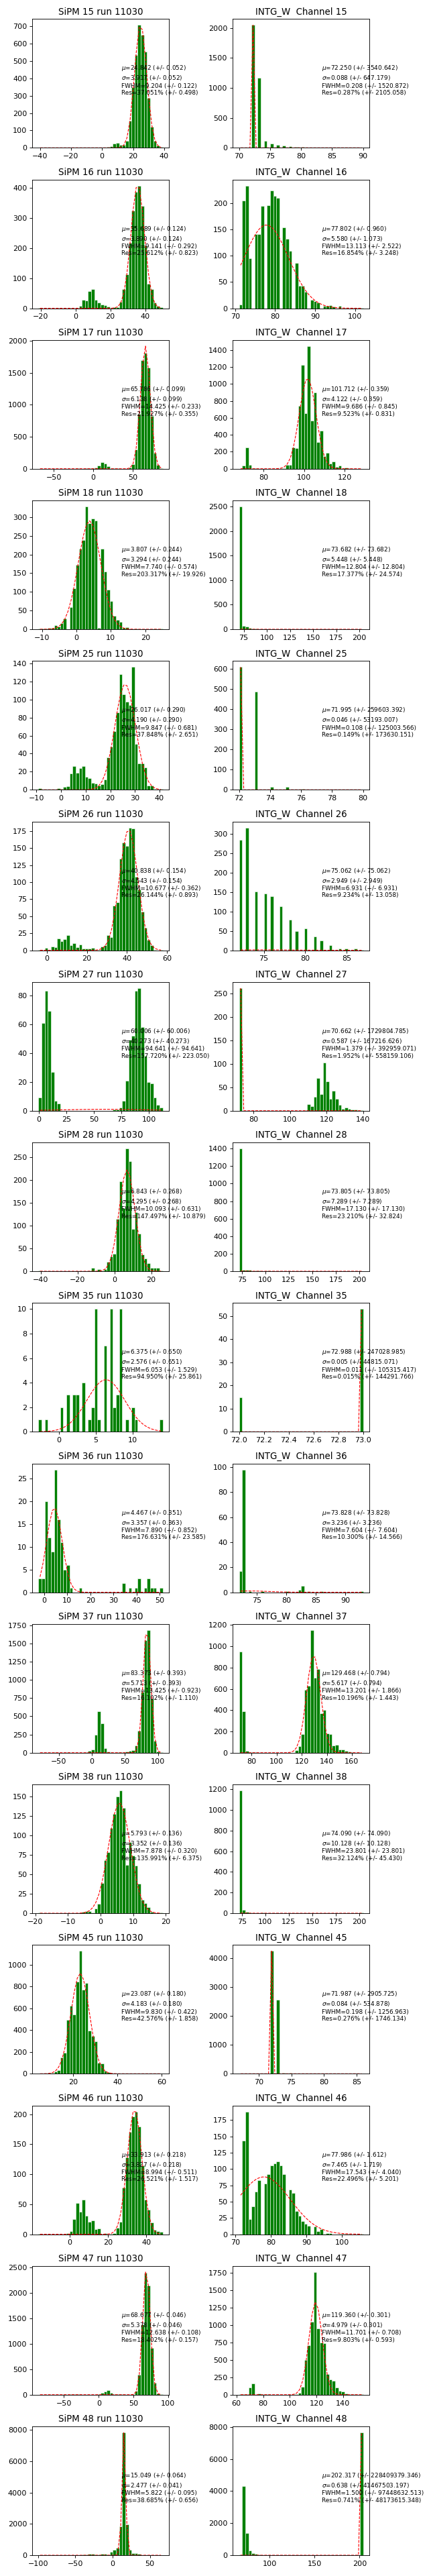

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fitting Problems
Fitting Problems


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


In [553]:

#fig = plt.figure(figsize=[9,8])
fig, axis = plt.subplots(len(sipm),2,figsize=(8,3*len(sipm)))

#sbp_fil = 20
#sbp_col = len(channels)*100

j=0


for i in sipm: 
    #sbp = sbp_fil + sbp_col + 2*j + 1
    #print(sbp)
    #axis = fig.add_subplot(sbp)
    
    TPcal.gauss_fit(data_plot[j]['efine_corrected'],40,True,axis[j,0],'','','SiPM '+str(i) +\
                    ' run '+str(runs[0]),[0.65,0.65,"left"])
    
    #sbp += 1
    #axis = fig.add_subplot(sbp)
    TPcal.gauss_fit(data_plot[j]['intg_w'],40,True,axis[j,1],'','','INTG_W '+' Channel '+str(i),[0.65,0.65,"left"])
    
    j += 1

    #axis = fig.add_subplot(223)
#TPcal.gauss_fit(data_plot_4p['efine_corrected'],200,True,axis,'','','Channel '+str(channels[channelp]) +\
#                ' run '+str(runsp[1]),[0.65,0.5,"left"])
#axis = fig.add_subplot(224)
#TPcal.gauss_fit(data_plot_3p,80,True,axis,'','','INTG_W '+' run '+str(runsp[1]),[0.65,0.5,"left"])
plt.tight_layout()

# RAW DATA

In [545]:
data_raw = []

for i in runs:
    data_aux=[]
    file_data = '/analysis/' + str(i) + '/hdf5/data/run_' + str(i) +\
                 '_'+ str(file_number).zfill(4) + '_trigger1_waveforms.h5'
    
    with pd.HDFStore(file_data,'r',complib="zlib",complevel=4) as storage:
        pre_window = pd.read_hdf(file_data,'/data')
        bd.compute_integration_window_size(pre_window)
        pre_window['intg_w'] = pre_window['intg_w'] - 5.0 
        data_aux.append(pre_window)
                
    data_raw.append(pd.concat(data_aux).reset_index())
            

## Filtering

In [546]:
data_plot_r = []
for i in sipm:
    data_plot_r.append(data_raw[0][(data_raw[0]['efine']>-100) & (data_raw[0]['efine']<1024) 
                            & (data_raw[0]['sensor_id']==i)
                            & (data_raw[0]['intg_w'] > 40)])

<IPython.core.display.Javascript object>


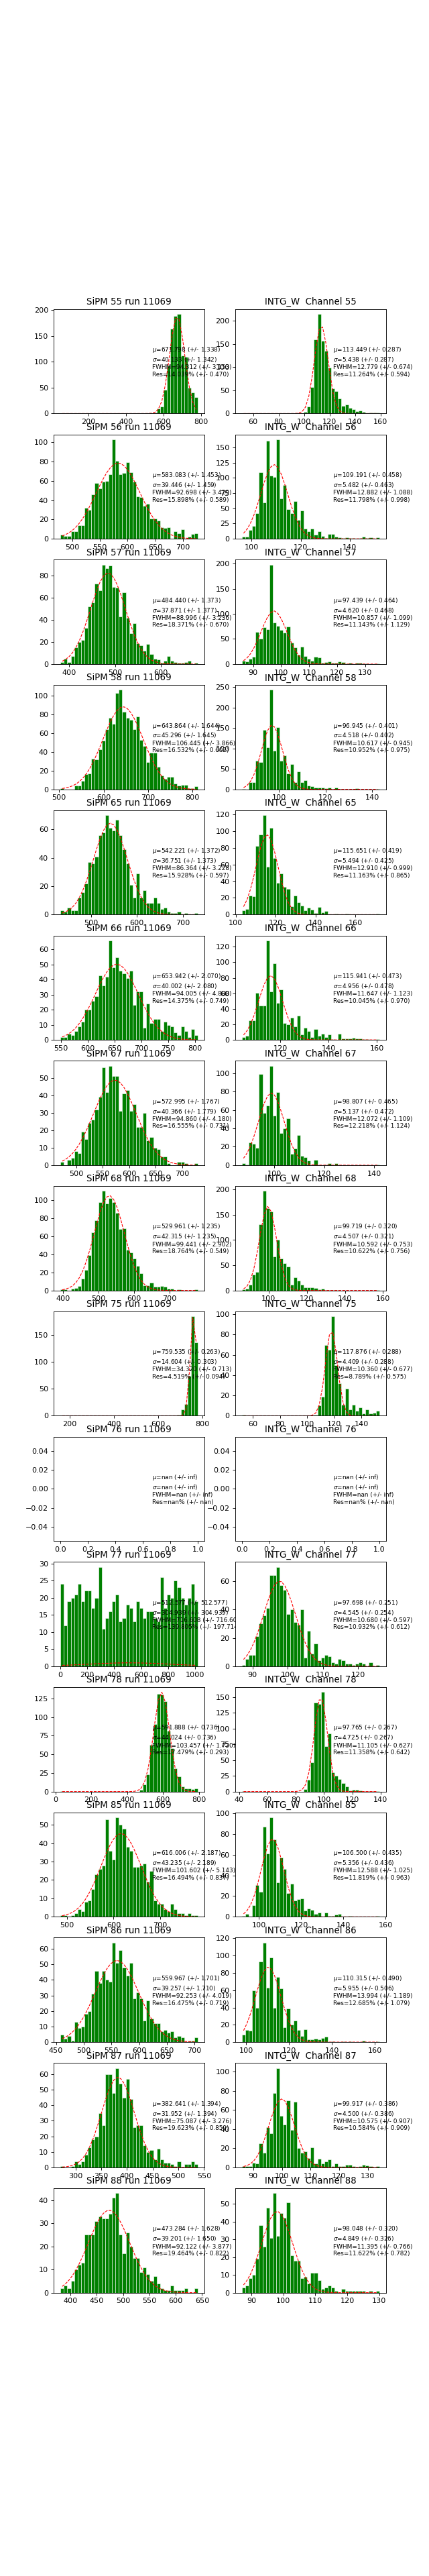

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_cal_lib.py:221: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/software/miniconda/envs/rawdata/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Fitting Problems


In [548]:
#fig = plt.figure(figsize=[9,8])

#sbp_fil = 20
#sbp_col = len(runs)*100

fig, axis = plt.subplots(len(sipm),2,figsize=(8,3*len(sipm)))

j=0

for i in sipm: 
    #sbp = sbp_fil + sbp_col + 2*j + 1
    #axis = fig.add_subplot(sbp)
    
    #TPcal.gauss_fit(data_plot_r[j]['efine'],80,True,axis,'','','Channel '+str(channels[channel]) +\
    #                ' run '+str(runs[j]),[0.65,0.5,"left"])
    
    #sbp += 1
    #axis = fig.add_subplot(sbp)
    #TPcal.gauss_fit(data_plot_r[j]['intg_w'],80,True,axis,'','','INTG_W '+' run '+str(runs[j]),[0.65,0.5,"left"])
    
    TPcal.gauss_fit(data_plot_r[j]['efine'],40,True,axis[j,0],'','','SiPM '+str(i) +\
                    ' run '+str(runs[0]),[0.65,0.65,"left"])
    
    TPcal.gauss_fit(data_plot_r[j]['intg_w'],40,True,axis[j,1],'','','INTG_W '+' Channel '+str(i),[0.65,0.65,"left"])
    
    j += 1
